In [1]:
import pandas as pd
import numpy as np
# import tensorflow as tf
# for tensorflow version 2.0.0 and higher run the code below
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# List of all csv filenames
GAS_TRAIN_DATA = 'Resources/Gas Data Last Year.csv'
GAS_TEST_DATA = 'Resources/Gas Data Last Month.csv'
GOLD_TRAIN_DATA = 'Resources/Gold Data Last Year.csv'
GOLD_TEST_DATA = 'Resources/Gold Data Last Month.csv'
OIL_TRAIN_DATA = 'Resources/Oil Data Last Year.csv'
OIL_TEST_DATA = 'Resources/Oil Data Last Month.csv'
SILVER_TRAIN_DATA = 'Resources/Silver Data Last Year.csv'
SILVER_TEST_DATA = 'Resources/Silver Data Last Month.csv'

# Data sets for stock we are currently assessing
current_train_data = GOLD_TRAIN_DATA
current_test_data = GOLD_TEST_DATA

In [3]:
# Number of data points to retrieve from csv files (varies in each file)
NUM_TRAIN_DATA_POINTS = 266
NUM_TEST_DATA_POINTS = 22

LEARNING_RATE = 0.1
NUM_EPOCHS = 100

In [5]:
# Function to load data that we want from csv files and return final and opening prices and volume for each day
def load_stock_data(stock_name, num_data_points):
    data = pd.read_csv(stock_name,
                       skiprows=0,
                       nrows=num_data_points,
                       usecols=['Price', 'Open', 'Vol.'])
    # Prices of stock at the end of each day
    final_prices = data['Price'].astype(str).str.replace(',','').astype(np.float)
    # Prices of stock at the beginning of each day
    opening_prices = data['Open'].astype(str).str.replace(',', '').astype(np.float)
    # Volume of stock exchanged throughout the day
    volumes = data['Vol.'].str.strip('MK').astype(np.float)
    return final_prices, opening_prices, volumes

In [6]:
# Function to calculate differences between opening price of the next day and final price of the current day
def calculate_price_differences(final_prices, opening_prices):
    price_differences = []
    for d_i in range(len(final_prices) - 1):
        price_difference = opening_prices[d_i + 1] - final_prices[d_i]
        price_differences.append(price_difference)
    return price_differences

In [7]:
def calculate_accuracy(expected_values, actual_values):
    num_correct = 0
    for a_i in range(len(actual_values)):
        if actual_values[a_i] < 0 < expected_values[a_i]:
            num_correct += 1
        elif actual_values[a_i] > 0 > expected_values[a_i]:
            num_correct += 1
    return (num_correct / len(actual_values)) * 100

In [8]:
# Training data sets
train_final_prices, train_opening_prices, train_volumes = load_stock_data(current_train_data, NUM_TRAIN_DATA_POINTS)
train_price_differences = calculate_price_differences(train_final_prices, train_opening_prices)
train_volumes = train_volumes[:-1]

# Testing data sets
test_final_prices, test_opening_prices, test_volumes = load_stock_data(current_test_data, NUM_TEST_DATA_POINTS)
test_price_differences = calculate_price_differences(test_final_prices, test_opening_prices)
test_volumes = test_volumes[:-1]

In [9]:
# Building computational graph after y = Wx + b

# Used to input volumes
x = tf.placeholder(tf.float32, name='x')
# Variables that our model will change to get actual output as close to expected output as possible
W = tf.Variable([.1], name='W')
b = tf.Variable([.1], name='b')
# How our model outputs the actual values
y = W * x + b
# Used to input expected values for training purposes (shows the model what a "good" outcome is)
y_predicted = tf.placeholder(tf.float32, name='y_predicted')

# Loss function based on the difference between actual and expected outputs
loss = tf.reduce_sum(tf.square(y - y_predicted))
# Optimizer aimed at minimizing loss by changing W and b
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

In [10]:
# Session is used to actually run the nodes
session = tf.Session()
# Need to initialize global variables
session.run(tf.global_variables_initializer())
for _ in range(NUM_EPOCHS):
    # Run the optimizer which will allow it to change the values of W and b to minimize loss
    session.run(optimizer, feed_dict={x: train_volumes, y_predicted: train_price_differences})

results = session.run(y, feed_dict={x: test_volumes})
accuracy = calculate_accuracy(test_price_differences, results)
print("Accuracy of model: {0:.2f}%".format(accuracy))

Accuracy of model: 61.90%


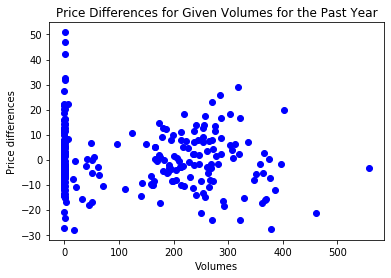

In [11]:
# Plotting purposes only, not necessary
plt.figure(1)
plt.plot(train_volumes, train_price_differences, 'bo')
plt.title('Price Differences for Given Volumes for the Past Year')
plt.xlabel('Volumes')
plt.ylabel('Price differences')
plt.show()